In [5]:
!pip install matplotlib==3.4.3
!pip install numpy==1.21.0
!pip install scikit_learn==0.24.2

Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 10.3MB 16.4MB/s eta 0:00:01
  Found existing installation: matplotlib 2.2.3
    Uninstalling matplotlib-2.2.3:
      Successfully uninstalled matplotlib-2.2.3
Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 15.7MB 10.8MB/s eta 0:00:01
ERROR: blackhole 1.0.1 has requirement numpy<=1.19.5, but you'll have numpy 1.21.0 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4
Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 22.3MB 8.6MB/s eta 0:00:011
ERROR: blackhole 1.0.1 has requirement numpy<=1.19.5, but you'll have numpy 1.21.0 which is incompatible.
  Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


In [6]:
# -*- coding:utf-8 -*-
import numpy as np 
import matplotlib.colors as colors
from sklearn import svm 
import sklearn.svm
from sklearn.svm import SVC
from sklearn import model_selection
import matplotlib.pyplot as plt 
import matplotlib as mpl

# Iris can be divided into three different varieties according to its calyx and petal size.
# data in CSV: sepal length, sepal width, petal length, petal width, type (target)

In [7]:
# load data 
# iris_type: turn string (bytes) into integer
def iris_type(s):
    index = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return index[s]

# data_path = './iris.csv'
data_path = '/home/aistudio/work/iris.csv'
data = np.loadtxt(
    data_path, # file path 
    dtype=float, # data type 
    delimiter=',', # CSV
    converters={4:iris_type}, # convert the 5th column into integer
)
print(data)
print(data.shape)
# data split 
x, y = np.split(
    data, 
    (4,), # columns [0-3]: X-axis, column 4: Y-axis
    axis=1, # split by column 
)
x = x[:, 0:2] # row-X: column [0-3], column-X: column [0-1] as feature for building graph 
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, # sample feature set 
    y, # sample result 
    random_state=1, # seed 
    test_size=0.3, # proportion of test samples
)

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

In [8]:
# build model 
def classifier():
   clf = svm.SVC(
       C=0.5, # error penalty coefficient, 1 by default 
       kernel="linear", 
       decision_function_shape='ovr',
   )
   return clf 

# definition of SVM model 
clf = classifier()


# train 
def train(clf, x_train, y_train):
    clf.fit(
        x_train, # feature vector of training set 
        y_train.ravel(), # target of training set 
)

# train SVM model 
train(clf=clf, x_train=x_train, y_train=y_train)

In [9]:
# evaluate 
def show_accuracy(a, b, tip):
    # check if a equals b
    # calculate average value of acc
    acc = (a.ravel() == b.ravel())
    print("%s accuracy: %.3f "%(tip, np.mean(acc)))

def print_accuracy(clf, x_train, y_train, x_test, y_test):
    print("training prediction: %.3f "%(clf.score(x_train, y_train)))
    print("testing data prediction: %.3f "%(clf.score(x_test, y_test)))
    # compare original results and predicted results
    show_accuracy(clf.predict(x_train), y_train, "training data")
    show_accuracy(clf.predict(x_test), y_test, "testing data")
    # calculate decision function 
    # the three values represent the distance of x to each split plane
    print("decision_function:\n", clf.decision_function(x_train))

print_accuracy(clf, x_train, y_train, x_test, y_test)

training prediction: 0.819 
testing data prediction: 0.778 
training data accuracy: 0.819 
testing data accuracy: 0.778 
decision_function:
 [[-0.30200388  1.26702365  2.28292526]
 [ 2.1831931  -0.19913458  1.06956422]
 [ 2.25424706  0.79489006 -0.20587224]
 [ 2.22927055  0.98556708 -0.22777916]
 [ 0.95815482  2.18401419 -0.17375192]
 [ 2.23120771  0.84075865 -0.19144453]
 [ 2.17327158 -0.14884286  0.92795057]
 [-0.28667175  1.11372202  2.28302495]
 [-0.27989264  1.21274017  2.25881762]
 [-0.29313813  1.24442795  2.2732035 ]
 [-0.27008816  1.2272086   2.22682127]
 [-0.25981661  2.21998499  1.20479842]
 [-0.17071168  0.99542159  2.17180911]
 [-0.30018876  1.25829325  2.2829419 ]
 [-0.17539342  2.15368837  1.06772814]
 [ 2.25702986  0.81715893 -0.22763295]
 [-0.23988847  2.23286001  1.06656755]
 [-0.26915223  2.23333222  1.21679709]
 [ 2.22927055  0.98556708 -0.22777916]
 [ 2.2530903   0.85932358 -0.2359772 ]
 [-0.26740532  1.20784059  2.23528903]
 [ 2.26803658  0.80468578 -0.24299359]
 

In [10]:
# implement model 
def draw(clf, x):
    iris_feature = ['sepal length', "sepal width", 'petal length', "petal width"]
    x0_min, x0_max = x[:, 0].min(), x[:, 0].max() # range of column 0
    x1_min, x1_max = x[:, 1].min(), x[:, 1].max() # range of column 1
    x0, x1 = np.mgrid[x0_min:x0_max:200j, x1_min:x1_max:200j] # generate grid sampling points 
    grid_test = np.stack((x0.flat, x1.flat), axis=1)
    print("grid_test: \n", grid_test)
    # print the distance from the sample to the decision plane 
    print("the distance to decision plane: \n", clf.decision_function(grid_test))

    grid_hat = clf.predict(grid_test) # predicted categorical value
    print("grid_hat: \n", grid_hat)
    grid_hat = grid_hat.reshape(x0.shape)

    cm_light = mpl.colors.ListedColormap(['#A0FFA0', "#FFA0A0", "#A0A0FF"])
    cm_dark = mpl.colors.ListedColormap(['g', 'b', 'r'])
    plt.pcolormesh(x0, x1, grid_hat, cmap=cm_light)
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), edgecolor='k', s=50, cmap=cm_dark) # sample point 
    plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolor='none', zorder=10)       # test point 
    plt.xlabel(iris_feature[0], fontsize=20)
    plt.ylabel(iris_feature[1], fontsize=20)
    plt.xlim(x0_min, x0_max)
    plt.ylim(x1_min, x1_max)
    plt.title('SVM in iris data classification', fontsize=30)
    plt.grid()
    plt.show()

grid_test: 
 [[4.3       2.       ]
 [4.3       2.0120603]
 [4.3       2.0241206]
 ...
 [7.9       4.3758794]
 [7.9       4.3879397]
 [7.9       4.4      ]]
the distance to decision plane: 
 [[ 2.17689921  1.23467171 -0.25941323]
 [ 2.17943684  1.23363096 -0.25941107]
 [ 2.18189345  1.23256802 -0.25940892]
 ...
 [-0.27958977  0.83621535  2.28683228]
 [-0.27928358  0.8332275   2.28683314]
 [-0.27897389  0.83034313  2.28683399]]
grid_hat: 
 [0. 0. 0. ... 2. 2. 2.]


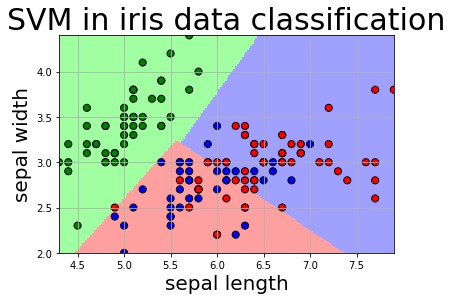

In [11]:
draw(clf, x)